# Lasso regression with block updating

Sometimes, it is very useful to update a set of parameters together. For example, variables that are highly correlated are often good to update together. In PyMC 3 block updating is simple, as example will demonstrate.

Here we have a LASSO regression model where the two coefficients are strongly correlated. Normally, we would define the coefficient parameters as a single random variable, but here we define them separately to show how to do block updates.

First we generate some fake data.

In [1]:
%matplotlib inline

import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab

d = np.random.normal(size=(3, 30))
d1 = d[0] + 4
d2 = d[1] + 4
yd = 0.2 * d1 + 0.3 * d2 + d[2]

Then define the random variables.

In [2]:
lam = 3

with pm.Model() as model:
    s = pm.Exponential("s", 1)
    tau = pm.Uniform("tau", 0, 1000)
    b = lam * tau
    m1 = pm.Laplace("m1", 0, b)
    m2 = pm.Laplace("m2", 0, b)

    p = d1 * m1 + d2 * m2

    y = pm.Normal("y", mu=p, sigma=s, observed=yd)

For most samplers, including Metropolis and HamiltonianMC, simply pass a list of variables to sample as a block. This works with both scalar and array parameters. 

In [3]:
with model:
    start = pm.find_MAP()

    step1 = pm.Metropolis([m1, m2])

    step2 = pm.Slice([s, tau])

    idata = pm.sample(10000, [step1, step2], start=start)

C:\Users\zufal\AppData\Local\Temp/ipykernel_9140/968888365.py:8: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  idata = pm.sample(10000, [step1, step2], start=start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [m1]
>>Metropolis: [m2]
>CompoundStep
>>Slice: [s]
>>Slice: [tau]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 42 seconds.
The number of effective samples is smaller than 10% for some parameters.


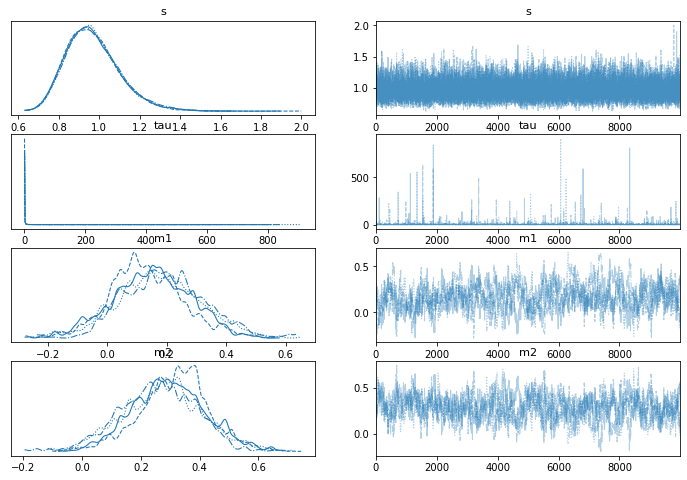

In [4]:
az.plot_trace(idata);

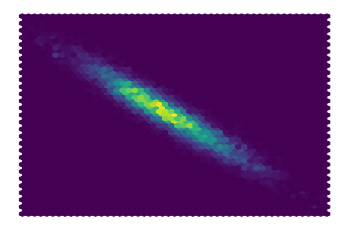

In [5]:
pylab.hexbin(idata.posterior["m1"], idata.posterior["m2"], gridsize=50)
pylab.axis("off");

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Jan 09 2022

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.30.1

arviz     : 0.11.4
pymc      : 4.0.0b1
matplotlib: 3.4.2
numpy     : 1.21.1

Watermark: 2.3.0

